# Extra Examples - Grouping

Lets use some video game sales data: https://www.kaggle.com/gregorut/videogamesales

And answer:

1. Which genre has the highest average global sales averaged over all games
2. Which top 5 games are responsible for the biggest profit in that genre?
3. For each platform and year, what is the highest performing game?
4. For each Genre, what is the mean and standard deviation for game sales in EU? 
5. Bonus advanced follow up - can you answer if mean and std is a good representation of the data? (Hint code provided)

In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv("vgsales.csv")
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

## Highest earning genre

In [41]:
# your code here
dfg = df.groupby('Genre').agg({'Global_Sales':np.average}).reset_index()
dfg.loc[dfg.Global_Sales == dfg.Global_Sales.max(),['Genre','Global_Sales']]

Genre  Global_Sales
4  Platform      0.938341

## Which games carry this genre?

In [45]:
# your code here
df[df['Genre'] == 'Platform'].sort_values('Global_Sales',ascending=False).Name.head()

1             Super Mario Bros.
6         New Super Mario Bros.
8     New Super Mario Bros. Wii
18            Super Mario World
21             Super Mario Land
Name: Name, dtype: object

## Best genre for platform and year

This one is actually a bit challenging to do efficiently, have fun!

In [47]:
# recommend doing this in a few steps. Get performance of each genre, 
# and then figure out which genre is the best.
# Not everything needs to be one line!
performance = df.groupby(['Platform','Year','Genre']).Global_Sales.sum().reset_index()
performance

Platform    Year         Genre  Global_Sales
0        2600  1980.0        Action          0.34
1        2600  1980.0      Fighting          0.77
2        2600  1980.0          Misc          2.71
3        2600  1980.0       Shooter          7.07
4        2600  1980.0        Sports          0.49
...       ...     ...           ...           ...
1799     XOne  2016.0  Role-Playing          0.52
1800     XOne  2016.0       Shooter          4.40
1801     XOne  2016.0    Simulation          0.01
1802     XOne  2016.0        Sports          3.74
1803     XOne  2016.0      Strategy          0.02

[1804 rows x 4 columns]

## Mean and Std in EU per Genre

In [59]:
# your code here
df.groupby('Genre').agg(MeanEU = ('EU_Sales', np.mean),
                       STDEU = ('EU_Sales', np.std))

MeanEU     STDEU
Genre                           
Action        0.158323  0.407424
Adventure     0.049868  0.176454
Fighting      0.119481  0.253013
Misc          0.124198  0.446592
Platform      0.227573  0.588545
Puzzle        0.087251  0.318550
Racing        0.190865  0.581181
Role-Playing  0.126384  0.488864
Shooter       0.239137  0.549189
Simulation    0.130773  0.514097
Sports        0.160635  0.776772
Strategy      0.066579  0.192594

## Is this a good representation?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

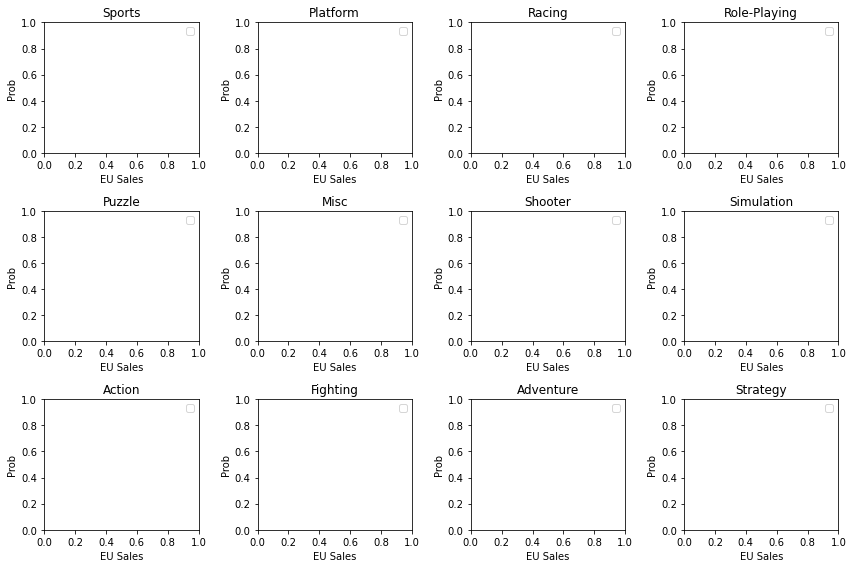

In [60]:
# Hint code, feel free to ignore
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

genres = df.Genre.unique()
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))
for g, ax in zip(genres, axes.flatten()):
    
    # Your code here to look at each genre and summary statistics (density=True is another hint)
       
    ax.set_title(g), ax.set_xlabel("EU Sales"), ax.set_ylabel("Prob")
    ax.legend();
plt.tight_layout();